                      Нижегородский государственный университет имени Н. И. Лобачевского

                                          Радиофизический факультет

                                                 
                                            
                                            ЛАБОРАТОРНАЯ РАБОТА №5
                                     
                                               
                                                 Вариант 4
                                                                                                                                                                           
                                                                                  
                                                                          Выполнил: Пластовец Вадим (430гр)
                                          
                                                                         
                                                  2016 год

## Задание 1

Вычисление определенного интеграла с помощью формулы Симпсона с относительной точностью 0.01.

$$\int\limits_0^5 \frac{ln(i^2t+1))} {(1+it+it^2)} dt$$


*Описание*:

Разбиваем элементарный участок [dx] на четное кол-во интервалов 
Используем формулу Симпсона:

$$I = h/3 * [f(x_0)+f(x_{2n})+2(f(x_2)+f(x_4)+...+f(x_{2n-2}) + 4(f(x_1)+f(x_3)+...+f(x_{2n-1})]$$
h - шаг, n - число узлов
$$h = [(k+dx)-(k)]/2n$$

0.006665602533889258
7
0.87174609491856


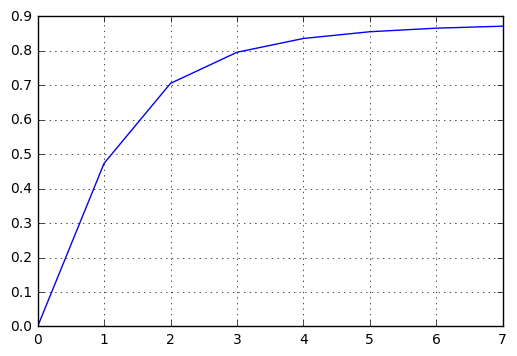

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt 

i=2

def f(t):
    f=(math.log(i*i*t+1))/(1+i*t+i*t*t)
    return f
def s(a,b):
    s = ((b-a)/6)*(f(a)+4*f((b+a)/2)+f(b))
    return s



#вычисление интеграла через trapz
E=[]
dx=0.1
r=0
while r<=5+dx:
    x=np.arange(0,r+dx,dx)
    y=[f(t) for t in x]
    I1=np.trapz(y,x,dx)
    E.append(I1)
    r+=dx
    


#inter - interval
#вычисление интеграла через Формулу Симпсона
inter=0
g=0
Isp=[]
vsp=[]
e = 0.01; b=5; a=0
while 1:
    I=0
    for c in range(0, inter):
        h=(b-a)/(inter)
        I+=s(a+c*h, a+(c+1)*h)
    Isp.append(I) 
    if inter > 0:
        if ((Isp[-1]-Isp[-2])/Isp[-1]) < e:
            break
    inter+=1
g=(Isp[-1]-Isp[-2])/Isp[-1]
print(g) 
v=range(0,inter+1)
print(inter)
print(Isp[-1])
plt.plot(v,Isp,)
plt.grid()
plt.show()

## Задание 2

1. Построить график подынтегральной функции.




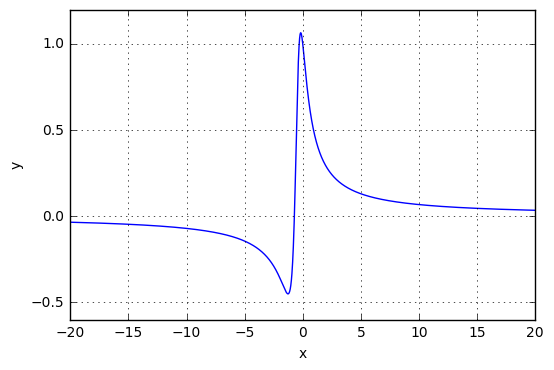

In [1]:





import math 
import matplotlib.pyplot as plt 
import numpy as np 

i=2
x = np.arange(-20, 20, 0.01) 
y = [ (math.log(i**2)*g+1)/(1+i*g+i*g**2) for g in x ] 

plt.plot(x,y)
plt.xlabel(('x'))
plt.ylabel(('y'))
plt.grid()
plt.show()


## Задание 2.1

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt 

i=1
def f(t):
    f=(math.log(i**2)*t+1)/(1+i*t+i*t**2)
    return f
s=[]; x=0; n=0; dx=0.01
x=n*dx
while x<=5 :
    x=np.arange(0,x+dx,dx)
    y=f(x)
    I1=np.trapz(y,x,dx)
    s.append(I1)
    n+=1
print(s)

## Задание 3

Решить систему 
$$$$
$$x_1 = 1$$
$$$$
$$ x_{i-1} - (4+cos(i)^2/(i^2+2))x_i + x_{i+1} = -1+\int\limits_0^5 \frac{ln(i^2t+1))} {(1+it+it^2)} dt$$
$$$$
$$x_n = 0$$
$$$$
методом минимальной невязки с относительной точностью 0.001
$$$$
*Описание:*
$$$$
Данная система уравнений выглядит следующим образом: АХ=В. Задаём матрицу А, затем задаём матрицу В. Матрицу Х для удобства заполняем единицами. Ищем невязку как N = B-AX. Вводим итерационный параметр t = (AD,A)/(AD,AD), который на каждой итерации выбирается так, чтобы минимизировать евклидову норму невязки N. Число итераций ограничивает параметр a=D[1]/X[1] (итерации продолжаются до тех пор, пока а > заданной точности). 

In [38]:
import numpy as np
import math

n=10

#задание матрицы А
A=np.zeros((n,n))
A[0,0]=1
A[n-1,n-1]=1
for i in range(1,n-1):
    A[i,i-1]=1
    A[i,i+1]=1
    A[i,i]=-(4+math.cos(i)*math.cos(i)/(i*i+2))

#задание матрицы В
B=[1]
for j in range(1,n-1): 
    dx=0.001; k=0; I=0
    while k<5: 
        I+=dx*(((math.log(j*j)*k+1)/(1+j*k+j*k*k))+4*((math.log(j*j)*((2*k+dx)/2)+1)/(1+j*((2*k+dx)/2)+j*((2*k+dx)/2)**2))+((math.log(j*j)*(k+dx)+1)/(1+j*(k+dx)+j*(k+dx)**2)))/6
        k+=dx
    B.append(-1+I)
B.append(0)

#задание матрицы X
X=np.ones((n))

#задание невязки
e=0.001; a=1; o=0
N=B-np.dot(A,X)
while a>0:
    a=0
    o+=1
    t=(np.dot(np.dot(A,N),N))/(np.dot(np.dot(A,N),np.dot(A,N)))
    X+=t*N
    N=B-np.dot(A,X)
    if abs(N[1]/X[1])>e:
        a+=1
        
#вывод значений
print('Полученные значения:',X[1],X[2],X[3],X[8])
Х=np.linalg.solve(A,B)
print('linalg:',Х[1],X[2],X[3],X[8])
print('Число итераций =', o)

Полученные значения: 0.208758929783 -0.115794139652 -0.152144078575 0.10842838069
linalg: 0.195462158625 -0.115794139652 -0.152144078575 0.10842838069
Число итераций = 7


## Задание 3.1

Решить систему с n = 10000



In [ ]:
import numpy as np
import math

n=10000

#задание матрицы А
A=np.zeros((n,n))
A[0,0]=1
A[n-1,n-1]=1
for i in range(1,n-1):
    A[i,i-1]=1
    A[i,i+1]=1
    A[i,i]=-(4+math.cos(i)*math.cos(i)/(i*i+2))

#задание матрицы В
B=[1]
for j in range(1,n-1): 
    dx=0.001; k=0; I=0
    while k<5: 
        I+=dx*(((math.log(j*j)*k+1)/(1+j*k+j*k*k))+4*((math.log(j*j)*((2*k+dx)/2)+1)/(1+j*((2*k+dx)/2)+j*((2*k+dx)/2)**2))+((math.log(j*j)*(k+dx)+1)/(1+j*(k+dx)+j*(k+dx)**2)))/6
        k+=dx
    B.append(-1+I)
B.append(0)

#задание матрицы X
X=np.ones((n))
X[0]=1
X[n-1]=0

#задание невязки
e=0.001
N=B-np.dot(A,X)
a=1
while a>0:
    a=0
    t=(np.dot(np.dot(A,N),N))/(np.dot(np.dot(A,N),np.dot(A,N)))
    X+=t*N
    N=B-np.dot(A,X)
    if abs(N[1]/X[1])>e:
        a+=1

#вывод значений
print(X[1],X[2],X[3],X[998])
Х=np.linalg.solve(A,B)
print(Х[1],X[2],X[3],X[998])

## Задание 4

1. Построить график решения Х(i) 
$$$$
X = [...] и n = [...] - график

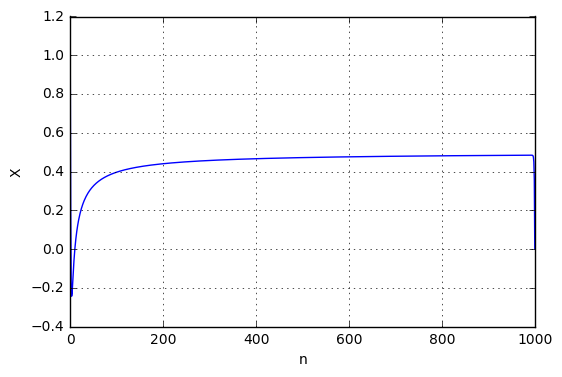

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
n=1000

#решение--------------------------------------------------------------------
A=np.zeros((n,n))
A[0,0]=1
A[n-1,n-1]=1
for i in range(1,n-1):
    A[i,i-1]=1
    A[i,i+1]=1
    A[i,i]=-(4+math.cos(i)*math.cos(i)/(i*i+2))
B=[1]

for j in range(1,n-1): 
    dx=0.001; k=0; I=0
    while k<5: 
        I+=dx*(((math.log(j*j)*k+1)/(1+j*k+j*k*k))+4*((math.log(j*j)*((2*k+dx)/2)+1)/(1+j*((2*k+dx)/2)+j*((2*k+dx)/2)**2))+((math.log(j*j)*(k+dx)+1)/(1+j*(k+dx)+j*(k+dx)**2)))/6
        k+=dx
    B.append(-1+I)
B.append(0)

X=np.ones((n))
X[0]=1
X[n-1]=0
#---------------------------------------------------------------------------
e=0.001
N=B-np.dot(A,X)
a=1
while a>0:
    a=0
    t=(np.dot(np.dot(A,N),N))/(np.dot(np.dot(A,N),np.dot(A,N)))
    X+=t*N
    N=B-np.dot(A,X)
    if abs(N[1]/X[1])>e:
        a+=1

no=range(0,n)
plt.plot(no,X)
plt.xlabel(('n'))
plt.ylabel(('X'))
plt.grid()
plt.show()

 2 . Построить график зависимости нормы решения от номера итерации метода численного решения системы

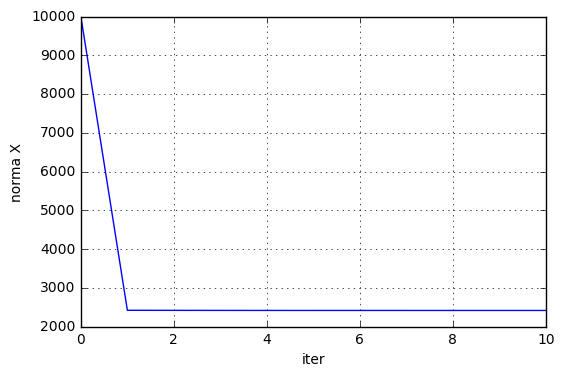

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
n=10000

#решение------------------------------------------------------------------
A=np.zeros((n,n))
A[0,0]=1
A[n-1,n-1]=1
for i in range(1,n-1):
    A[i,i-1]=1
    A[i,i+1]=1
    A[i,i]=-(4+math.cos(i)*math.cos(i)/(i*i+2))
B=[1]

for j in range(1,n-1): 
    dx=0.001; k=0; I=0
    while k<5: 
        I+=dx*(((math.log(j*j)*k+1)/(1+j*k+j*k*k))+4*((math.log(j*j)*((2*k+dx)/2)+1)/(1+j*((2*k+dx)/2)+j*((2*k+dx)/2)**2))+((math.log(j*j)*(k+dx)+1)/(1+j*(k+dx)+j*(k+dx)**2)))/6
        k+=dx
    B.append(-1+I)
B.append(0)
#---------------------------------------------------------------------------
X=np.ones((n))
X[0]=1
X[n-1]=0

e=0.001; a=1; o=0
N=B-np.dot(A,X)
NormaX=[np.dot(X,X)]
while a>0:
    a=0
    o+=1
    t=(np.dot(np.dot(A,N),N))/(np.dot(np.dot(A,N),np.dot(A,N)))
    X+=t*N
    N=B-np.dot(A,X)
    if abs(N[1]/X[1])>e:
        a+=1
    NormaX.append(np.dot(X,X))

io=range(0,o+1)
plt.plot(io,NormaX)
plt.xlabel(('iter'))
plt.ylabel(('norma X'))
plt.grid()
plt.show()